Alfaifi, Ammar
201855360

# Objective
To learn and analyze the electromagnetic radiation intensity as it travels through space. Also, to find some related calculations such as absorption law. 

In [1]:
# import the needed libs
import numpy as np 
import scipy as sc 
import sympy as sp 
import astropy
import pandas as pd
import matplotlib.pyplot as plt 

from IPython.display import set_matplotlib_formats, Markdown, display
set_matplotlib_formats('png', 'pdf')

plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')
plt.rc('figure', dpi=120)
plt.rc("figure", figsize=(6, 3))

# Theory
## We will use the absorption equation $$I=I_{0} e^{-\mu_{m} t_{d}}$$  to find the constant $\mu_{m}$.

# Measurments & Data

First loading the data into dataFrame
Given that initial initial intensity $I_{0}=8000 counts/s$

In [2]:
# set the given value
I_0 = 8000
# Load the data into a pandas dataFrame from data.csv
data = pd.read_csv("data.csv")
data

,Pb Absorber thickness t_d [cm],Radiation count rate [counts/s]
0,0.3,4490
1,0.6,2655
2,1.0,1810
3,1.2,922
4,2.8,42


# Calculations
## First plot the raw data

In [3]:
# Plot the raw data
data.plot(x="Pb Absorber thickness t_d [cm]", y="Radiation count rate [counts/s]")

<AxesSubplot:xlabel='Pb Absorber thickness t_d [cm]'>

RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.21 (TeX Live 2020) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode

(/Users/ammaralfaifi/.matplotlib/tex.cache/3bbc0f8d536770a62891b7cc8788c317.tex
LaTeX2e <2020-02-02> patch level 5
L3 programming layer <2020-03-06>
(/usr/local/texlive/2020basic/texmf-dist/tex/latex/base/article.cls
Document Class: article 2019/12/20 v1.4l Standard LaTeX document class
(/usr/local/texlive/2020basic/texmf-dist/tex/latex/base/size10.clo))

! LaTeX Error: File `type1cm.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.5 \usepackage
               {type1ec}^^M
No pages of output.
Transcript written on 3bbc0f8d536770a62891b7cc8788c317.log.




## Manipulate  the equation to get a straight line equation

$$\ln{(I/I_{0})}=-\mu_{m} t_{d}$$
where $\mu_m$ is the line slope

Thus the slope of the best fit line is $\mu_m=1.893/cm$

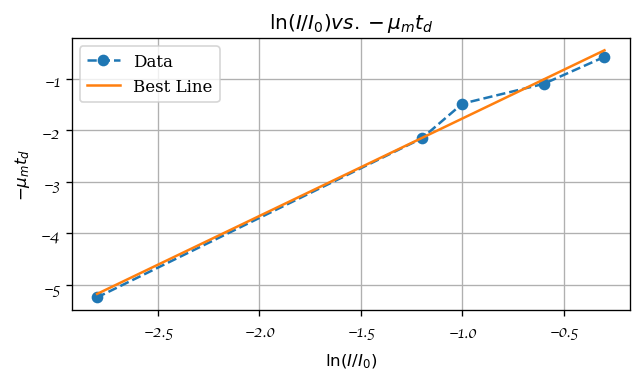

In [16]:
y = np.log(data["Radiation count rate [counts/s]"]/I_0)
x = -data["Pb Absorber thickness t_d [cm]"]

# find the best line
slope, _ = np.polyfit(x, y, 1)
f = np.poly1d(np.polyfit(x, y, 1))
# plotting
plt.plot(x, y, "--o", label="Data")
plt.plot(x, f(x), "-", label="Best Line")
#Style
plt.xlabel("$\ln{(I/I_{0})}$")
plt.ylabel("$-\mu_{m} t_{d}$")
plt.title("$\ln{(I/I_{0})} vs. -\mu_{m} t_{d}$")
plt.legend()
plt.grid()
display(Markdown(f"Thus the slope of the best fit line is $\mu_m={slope:0.3f}/cm$"))
plt.show()

# Conclusion
In short, in this lab, we aimed to learn more about electromagnetic radiation in terms of its intensity through distance. We found that as the thickness of a material increases the intensity on the other side decreases exponentially. We analyzed the experiment by the absorption equation $\ln{(I/I_{0})}=-\mu_{m} t_{d}$ where $\mu_m$ is the line slope. We found its value approximately equals $\mu_m=1.893cm^{-1}$